### Implement attention algorithm based on Pytorch

attention is the base of transformer and transformer is base of BERT, so let's first try to implement Attention. 

Let's try to make it more in real world based on sentences and co-occurrence matrix.

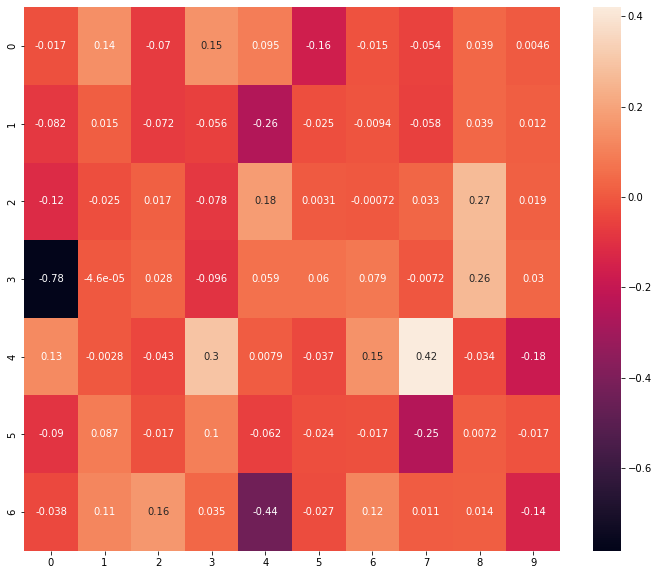

In [16]:
import numpy as np 
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

sens = ["I love python", "I love machine learning"]
words = [x.split() for x in sens]

unique_words = list(w for x in words for w in x)
# no need for make it as co-occurrence matrix
"""
d = {w:k for k, w in enumerate(unique_words)}

n = len(unique_words)

matrix = np.zeros((n, n))

# make co-occurrence counter first, then based on counter dict to fillin the matrix
counter = defaultdict(list)
for s in words:
    # based on each sentence to make two pairs of words
    for i in range(len(s) - 1):
        w = [s[i], s[i+1]]
        if w not in counter:
            counter[w] = 1
        else:
            counter[w] += 1   
"""

# encode each word into matrix, we could use pre-trained vector
# word_index = {w: np.random.randn(10) for w in unique_words}

# word matrix
word_matrix = np.random.randn(len(unique_words), 10)

# next is position encoding
position = np.arange(len(unique_words))

# have to make a query matrix
key_matrix = np.random.randn(len(unique_words), 10)

# value matrix
value_matrix = np.random.randn(len(unique_words), 10)

# compute score
scores = word_matrix * key_matrix 

scores = F.softmax(torch.tensor(scores), dim=-1)

# multiply with values
values = scores * torch.tensor(value_matrix)

fig = plt.figure(figsize=(12, 10))

# this heatmap is attention output attention.
sns.heatmap(values, annot=True)
plt.show()


In [14]:
help(sns.heatmap)

Help on function heatmap in module seaborn.matrix:

heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
    Plot rectangular data as a color-encoded matrix.
    
    This is an Axes-level function and will draw the heatmap into the
    currently-active Axes if none is provided to the ``ax`` argument.  Part of
    this Axes space will be taken and used to plot a colormap, unless ``cbar``
    is False or a separate Axes is provided to ``cbar_ax``.
    
    Parameters
    ----------
    data : rectangular dataset
        2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
        is provided, the index/column information will be used to label the
        columns and rows.
    vmin, vmax : floats, optional
        Values to anchor the colormap, otherwise 